In [300]:
#importing libraries required

import numpy
import pandas_datareader as pdr
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from numpy import array


# All tensorflow modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [301]:
df = yf.download('APOLLOHOSP.NS', start='1998-03-08', end='2022-10-21')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01 00:00:00+05:30,63.549999,65.449997,63.549999,64.974998,54.099964,107294
2002-07-02 00:00:00+05:30,65.000000,66.974998,65.000000,66.199997,55.119926,224240
2002-07-03 00:00:00+05:30,66.449997,66.900002,64.550003,64.949997,54.079151,97578
2002-07-04 00:00:00+05:30,65.400002,66.250000,64.824997,65.074997,54.183224,99150
2002-07-05 00:00:00+05:30,65.500000,66.224998,64.550003,65.425003,54.474659,219024


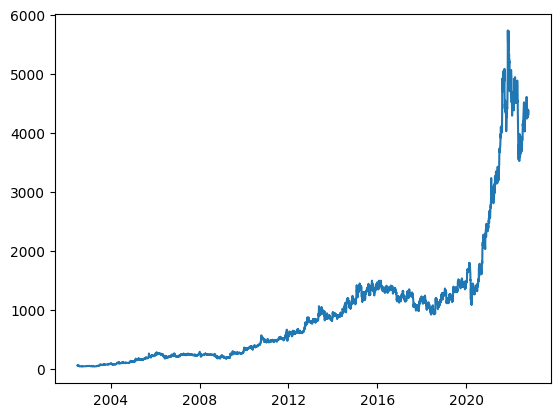

In [302]:
# plotting chart for visualization

plt.plot(df['Close'])

In [303]:
#Arranging data into one variable for closing prices

df1 = df['Close']

In [304]:
df1

Date
2002-07-01 00:00:00+05:30      64.974998
2002-07-02 00:00:00+05:30      66.199997
2002-07-03 00:00:00+05:30      64.949997
2002-07-04 00:00:00+05:30      65.074997
2002-07-05 00:00:00+05:30      65.425003
                                ...     
2022-10-14 00:00:00+05:30    4297.149902
2022-10-17 00:00:00+05:30    4290.850098
2022-10-18 00:00:00+05:30    4366.000000
2022-10-19 00:00:00+05:30    4388.750000
2022-10-20 00:00:00+05:30    4322.500000
Name: Close, Length: 5046, dtype: float64

In [305]:
# transforming data into MinMaxScaler Using numpy array

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [306]:
# Checking data (This block is not required)

print(df1)

[[0.00328781]
 [0.00350319]
 [0.00328341]
 ...
 [0.75948869]
 [0.76348857]
 [0.75184058]]


In [ ]:
# Splitting of data for the purpose of training and testing set

training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data = df1[0:training_size, :]
test_data = df1[training_size: len(df1), :1]

In [308]:
# now converting numpy array into dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i + time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [309]:
# resizing data into X=t, t+1, t+2, t+3

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [310]:
#Checking data (Block not required)

print(X_train.shape)
print(y_train.shape)

(3431, 100)
(3431,)


In [311]:
# Creating "Stacked" LSTM Structure

model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [312]:
# Visualizing structure of the created LSTM model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [313]:
#training model

model.fit(X_train,y_train,validation_data = (X_test,ytest), epochs=50, batch_size=64, verbose=1)


Epoch 1/50
54/54 [==============================] - 10s 155ms/step - loss: 5.9045e-04 - val_loss: 0.0020
Epoch 2/50
54/54 [==============================] - 5s 95ms/step - loss: 3.4285e-05 - val_loss: 0.0023
Epoch 3/50
54/54 [==============================] - 5s 101ms/step - loss: 3.3877e-05 - val_loss: 0.0035
Epoch 4/50
54/54 [==============================] - 5s 97ms/step - loss: 3.2354e-05 - val_loss: 0.0039
Epoch 5/50
54/54 [==============================] - 6s 106ms/step - loss: 3.3330e-05 - val_loss: 0.0040
Epoch 6/50
54/54 [==============================] - 5s 96ms/step - loss: 3.4264e-05 - val_loss: 0.0046
Epoch 7/50
54/54 [==============================] - 5s 98ms/step - loss: 3.3431e-05 - val_loss: 0.0048
Epoch 8/50
54/54 [==============================] - 6s 106ms/step - loss: 3.2149e-05 - val_loss: 0.0036
Epoch 9/50
54/54 [==============================] - 5s 99ms/step - loss: 3.2324e-05 - val_loss: 0.0043
Epoch 10/50
54/54 [==============================] - 5s 97ms/step - 

In [314]:
# Predictions

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

45/45 [==============================] - 1s 13ms/step


In [315]:
#Transforming predicted data back to readable prices

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [348]:
# Performance metrics as RMSE 
math.sqrt(mean_squared_error(y_train, train_predict))

648.9209797047637

In [349]:
#testdata
math.sqrt(mean_squared_error(ytest, test_predict))

2449.305538790256

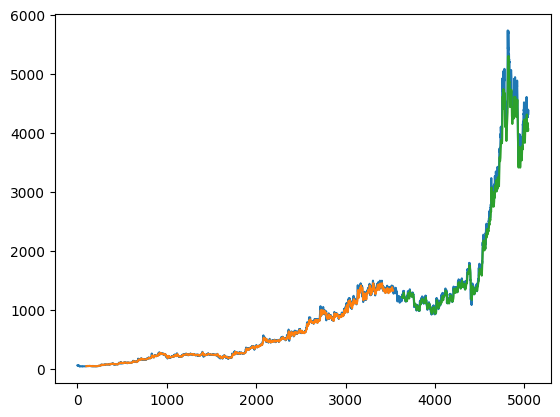

In [350]:
# Visualizing the predictions

# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [351]:
# For predicting the next x days
# By now our model has been validated and is showing accurate results
# Real life implementation of our code will be seen now
# This has been a fun project to work on and can be used for analysis purposes
# 

In [352]:
# Creating input data 

test_days = len(test_data) - 100
print("Length of total data: ", len(test_data))
test_days

Length of total data:  1514


1414

In [353]:
# now considering t-100 days for this length of data
x_input=test_data[test_days:].reshape(1,-1)

In [354]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [355]:
# Code to predict the next 10 days

# Algorithm to arrange predicted data

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

In [356]:
# Plotting of the aquired data

day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [357]:
# viewing size of df1

print(len(df1))
test_days1 = len(df1) - 100
test_days1

5046


4946

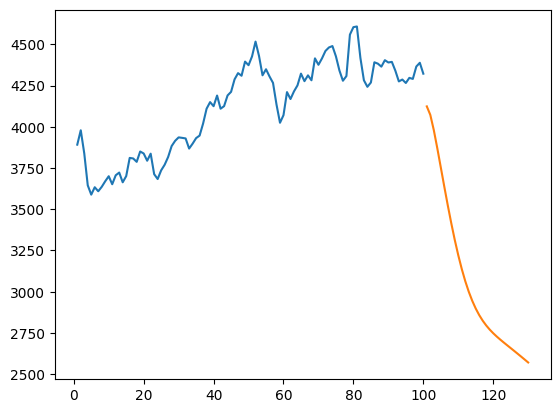

In [358]:
# Visualizing predicted data
# as we can see a beautifully predicted chart

plt.plot(day_new,scaler.inverse_transform(df1[test_days1:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [359]:
# Visualizing detailed predictions done by LSTM

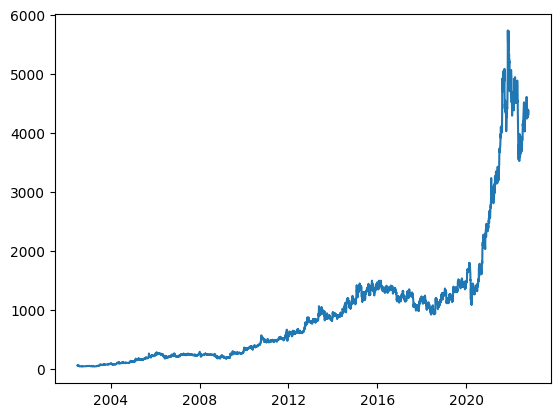

In [360]:
# Final Observations
# viewing current Chart

plt.plot(df['Close'])

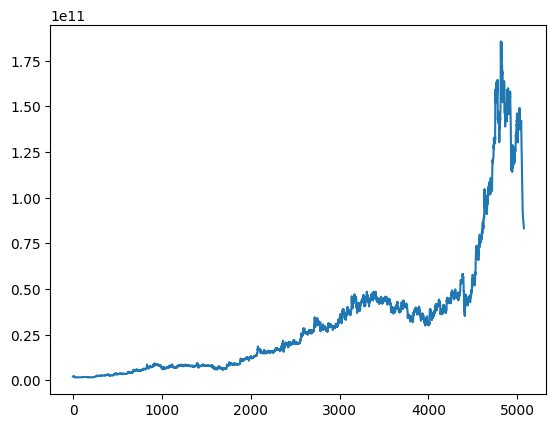

In [361]:
# Viewing predicted chart

df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)